# Deutsch-Jozsa
&nbsp;

## Contents

1. [Deutsch-Jozsa Algoritm](#dja)
2. [Generalised Oracle Function](#oracle)
3. [Simulate the Real Devices](#s_real)

&nbsp;

#### Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize

from qiskit.tools.visualization import *

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2022-10-24 09:21:35,137: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

&nbsp;

## 1. Deutsch–Jozsa algorithm<a id='dja'></a>

&nbsp;

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$  bits into either 0 or 1. We do not know the logic behind it. **We know that it is either constant or balanced**:
- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half the input value and 1 for the other half


For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. We are given a black box, an **oracle**, that takes as input a bit and outputs the unknown value.
<p>

<img src="https://avalon-lang.readthedocs.io/en/latest/_images/classical.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
    
To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. 

Before transforming it into a quantum problem, we need our black box to be an oracle which allows for **reversible computation**, like so:
<p>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

### Algorithm


Let us imagine the following procedure:
**1.** We begin with two qubits, $|a \rangle$ in state $|0\rangle$ and $| b \rangle$ in state $|1\rangle$: $\; |01\rangle$.

$$\lvert \psi_0 \rangle = \lvert 0\rangle^{\oplus n} \lvert 1 \rangle \mbox{, where } n = 1$$

**2.** We apply a Hadamard to each qubit $H^{\oplus n+1}$.

$$\sum_x \frac{\lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle)}{\sqrt{2}} \right]$$

The result is $\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

**3.** We now call our oracle, which maps $|ab\rangle$ or $|a\rangle |b\rangle$ (easier to interpret) into $|a\rangle |b \oplus f(a)\rangle$ the result is:

$$ \frac{1}{\sqrt{2^{n+1}}} \sum_x \lvert x \rangle (\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle )$$

$$\frac{1}{2}( \; |0\rangle |0\oplus f(0)\rangle \;-\; |0\rangle |1\oplus f(0)\rangle \;+\; |1\rangle |0\oplus f(1)\rangle \;-\; |1 \rangle |1\oplus f(1)\rangle \;)$$

We can now use the following equivalence:

$$|0 \oplus a\rangle - |1 \oplus a\rangle =  (-1)^a(|0\rangle - |1\rangle)$$

To replace above and get:

$$\frac{1}{2}[|0\rangle \,\otimes \, (-1)^{f(0)}(|0\rangle - |1\rangle)\; +\; |1\rangle \,\otimes \,(-1)^{f(1)}(|0\rangle - |1\rangle)]$$

This quantum state can be separated into the product state:

$$ \sum_{x} \frac{(-1)^{f(x)} \lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle - \lvert 1 \rangle)}{\sqrt{2}} \right] $$

$$ [\frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(1)}| 1 \rangle] \; \otimes \; [\frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle] $$

Our second qubit can now be ignored, and what remains is our first qubit, which contains both $f(0)$ and $f(1)$ - both images of $f$ with a single pass over the oracle. This can further be simplified as:

$$(-1)^{f(0)}(\frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(0) \oplus f(1)} | 1 \rangle)$$


**4.** Lastly, we apply a Hadamard gate on our qubit and we arrive at:

$$\sum_{x,y} \frac{(-1)^{f(x) \oplus (x\cdot y)} \lvert x \rangle}{2^n} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle )}{\sqrt{2}} \right]$$

$$(-1)^{f(0)} |f(0) \oplus f(1)\rangle$$

**5.** Measure the first $n$ qubits. The probability of measuring $\lvert 0\rangle \oplus n$:

$$ \left| \sum_x \frac{(-1)^{f(x)}}{2^n} \right| ^2 $$

Let’s start with some intuition of how this algorithm works, to do that we are going to recall one of the famous problems that classical physics could not explain,the double slit experiment.
This experiment makes clear that some particles (like photons, protons or electrons) have a wave-like behavior, creating interference patterns.
In other words, the probability of a particle hitting a specific detector depends on the type of interference in the path. If the interference is destructive the probability is small, and if it is constructive there is a high probability of hitting the detector.

The Deutsch-Jozsa algorithm sees the constant function as the one that has constructive interference and the balanced one as the one with destructive interference.
Therefore, we can expect to see a probability close to $100\%$ when the function is constant and a different result from the balanced function.


* When $f$ is constant the probability is $1$ (constructive interference);
* When $f$ is balanced the probability is $0$ (destructive interference).

In other words

- if f is constant ($00$ or $11$) $\rightarrow$ output is $0$ (xor is 0)
- if f is balanced ($01$ or $10$) $\rightarrow$ output is $\pm 1$ (xor is 1)

Which, in fact, means that we can do a *single pass* over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing.

Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes, while **a quantum function would still require 1 pass**.

<p>
<p>

### Quantum parallelism

A quantum register has the ability to exist in a superposition of base states - each one may be thought of as a single argument to a function. 

A function performed on the register in a superposition of states is thus performed on each of the components of the superposition, _while only being applied once_.

<div class="alert alert-block alert-warning">

**Exercise - Building a circuit for the Deutsch-Josza algorithm**
    
1.1. with constant $f$ with $n=3$
<p>
1.2. with balanced $f$ with $n=3$
<p>
1.3. Verify your circuit
    
    
**Tip** - generalize your oracle with np.random.randint(low, high=None, size=None, dtype=int) or explay or choises. 
</div>

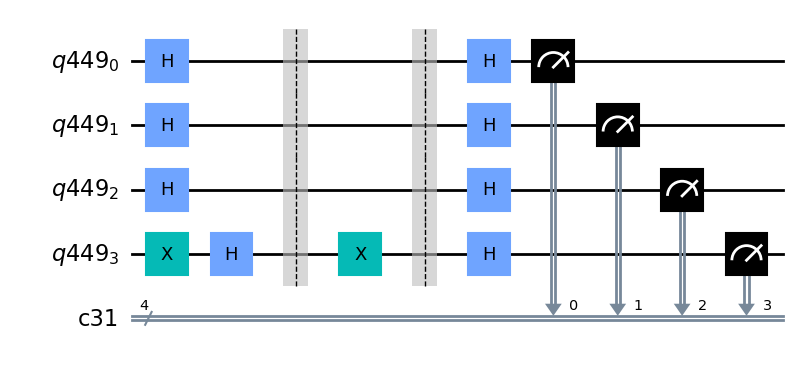

In [68]:
n=3
qr, cr = QuantumRegister(n+1), ClassicalRegister(n+1)
const_deutsch = QuantumCircuit(qr, cr)


#prepare quantum registers
const_deutsch.x(qr[3])

#apply hadamard gate to each qubit
const_deutsch.h(qr)

const_deutsch.barrier()

# contant oracle 
# First decide what the fixed output of the oracle will be
# (either always 0 or always 1)
const_deutsch.x(qr[3])



const_deutsch.barrier()

#apply hadamard gate to each qubit
const_deutsch.h(qr)


#measure
const_deutsch.measure(qr, cr)

#draw your circuit
const_deutsch.draw(output="mpl")

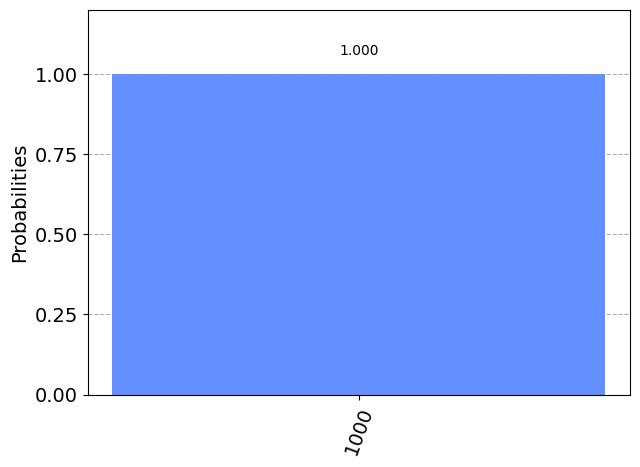

In [69]:
# Performing measurements for const
sim = Aer.get_backend("qasm_simulator")
job = execute(const_deutsch, sim, shots=1)
result = job.result()
plot_histogram(result.get_counts())

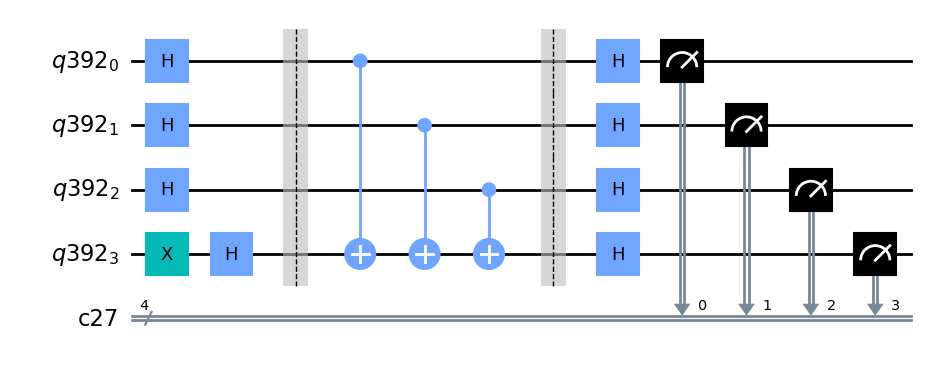

In [60]:
# Balanced f Quantum Circuit
n=3
qr, cr = QuantumRegister(n+1), ClassicalRegister(n+1)
balanced_deutsch = QuantumCircuit(qr, cr)


#prepare quantum registers
balanced_deutsch.x(qr[3])

#apply hadamard gate to each qubit
balanced_deutsch.h(qr)

balanced_deutsch.barrier()

# contant oracle 
# First decide what the fixed output of the oracle will be
# (either always 0 or always 1)
balanced_deutsch.cx(qr[0], qr[3])
balanced_deutsch.cx(qr[1], qr[3])
balanced_deutsch.cx(qr[2], qr[3])




balanced_deutsch.barrier()

#apply hadamard gate to each qubit
balanced_deutsch.h(qr)


#measure
balanced_deutsch.measure(qr, cr)

#draw your circuit
balanced_deutsch.draw(output="mpl")

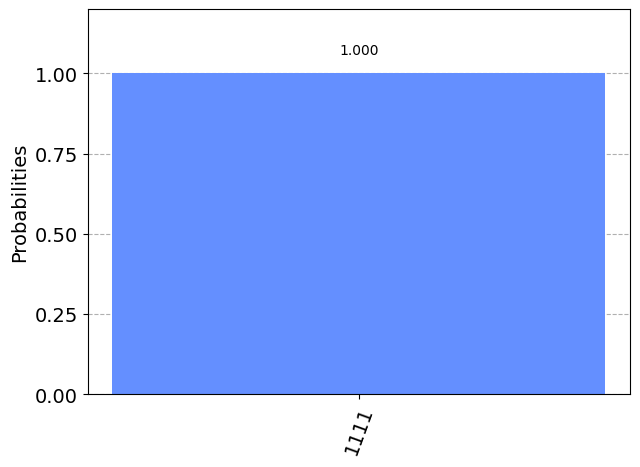

In [61]:
# Performing measurements for balanced
sim = Aer.get_backend("qasm_simulator")
job = execute(balanced_deutsch, sim, shots=1)
result = job.result()
plot_histogram(result.get_counts())

**Refs**

* [Deutsch-Josza Algorithm - Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html)
* [Lesson 38 Quantum Computing, Deutsch's Problem](https://www.youtube.com/watch?v=5xsyx-aNClM)

&nbsp;

## 2. Generalised Oracle Function<a id='oracle'></a>

&nbsp;

<div class="alert alert-block alert-warning">

**Exercise** - Define a generalised function that takes Deutsch-Jozsa oracles (either `'balanced'`, `'constant'`) and turns them in quantum gates.
    
</div>

In [115]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(n):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

        
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        
        # Next, place the final X-gates
        for qubit in range(n):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)


    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)

        # If the output is 1, we need to flip the output qubit:
        if output == 1:
            oracle_qc.x(n)

    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [123]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

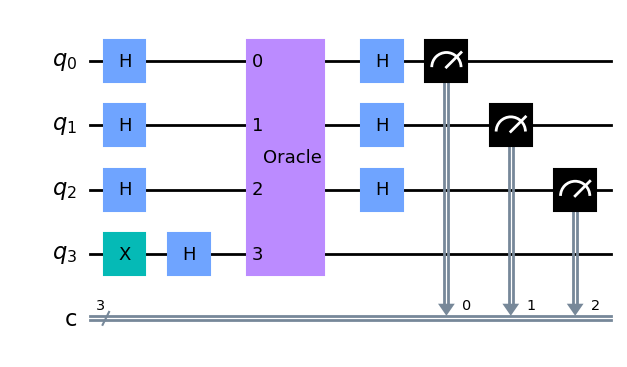

In [154]:
n = 3
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output='mpl')

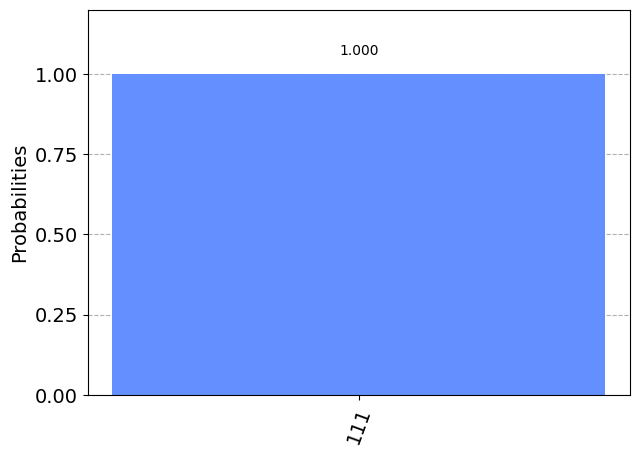

In [155]:
job = execute(dj_circuit, sim, shots=1)
result = job.result()
counts_sim=result.get_counts()
plot_histogram(counts_sim)

&nbsp;

## 3. Simulate the Real Devices<a id='s_real'></a>

&nbsp;

In [156]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibm_oslo                     ibm_nairobi                  ibmq_manila
--------                     -----------                  -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 16             Pending Jobs: 547            Pending Jobs: 269
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      115.4          Avg. T1:      137.1          Avg. T1:      130.6
Avg. T2:      94.0           Avg. T2:      80.0           Avg. T2:      56.4



ibmq_quito                  ibmq_belem                   ibmq_lima
----------                  ----------                   ---------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 15            Pending Jobs: 56             Pending Jobs: 470
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operationa

<div class="alert alert-block alert-warning">

**Exercise** - Select a backend.
    
</div>

In [157]:
backend_device = provider.get_backend('ibmq_quito')
print("Running on: ", backend_device)

Running on:  ibmq_quito


In [158]:
from qiskit.providers.aer import AerSimulator

In [159]:
sim_device = AerSimulator.from_backend(backend_device)

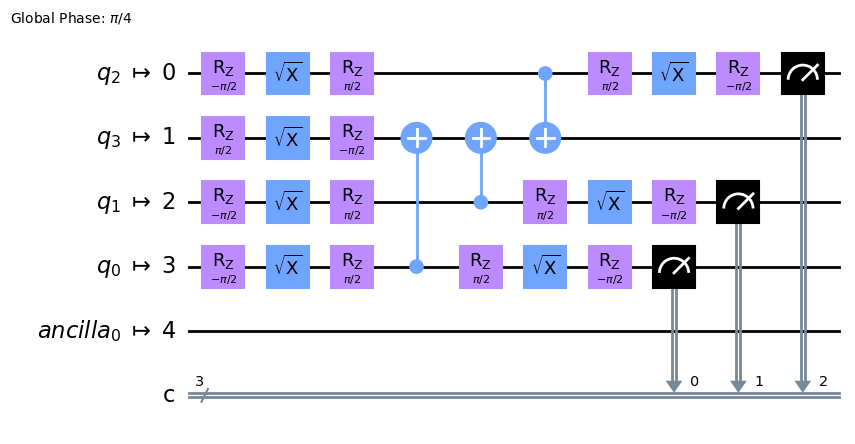

In [160]:
# Transpile the circuit for the noisy basis gates
noisy_qc = transpile(dj_circuit, sim_device)
noisy_qc.draw(output='mpl')

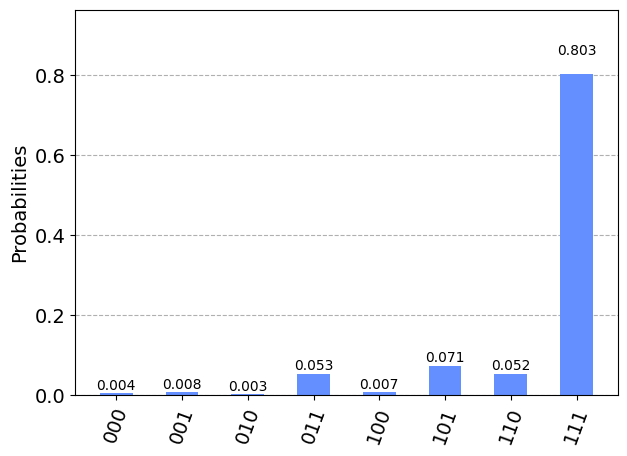

In [161]:
# Execute noisy simulation and get counts
result_noise = sim_device.run(noisy_qc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise)

<div class="alert alert-block alert-warning">

**Exercise** - Add an optimization level.
    
</div>

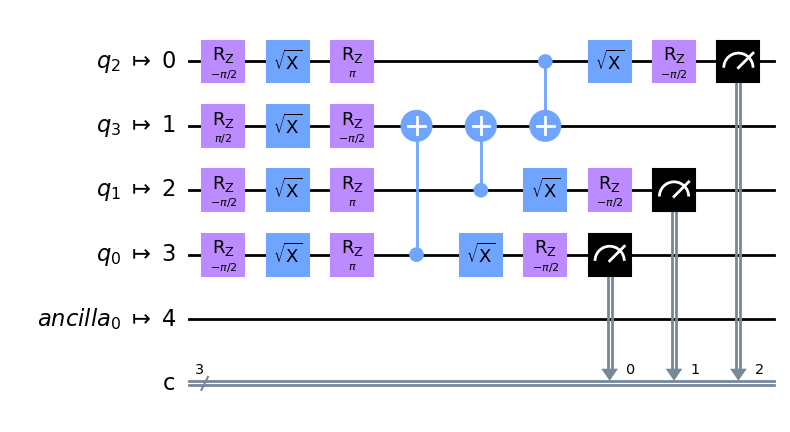

In [169]:
qc_optimized = transpile(dj_circuit, sim_device, optimization_level=3)
qc_optimized.draw(output='mpl')

In [163]:
dj_circuit.depth()

5

In [164]:
noisy_qc.depth()

10

In [165]:
qc_optimized.depth()

9

In [166]:
# Execute noisy simulation and get counts
result_noise_o = sim_device.run(qc_optimized).result()
counts_noise_o = result_noise_o.get_counts(0)

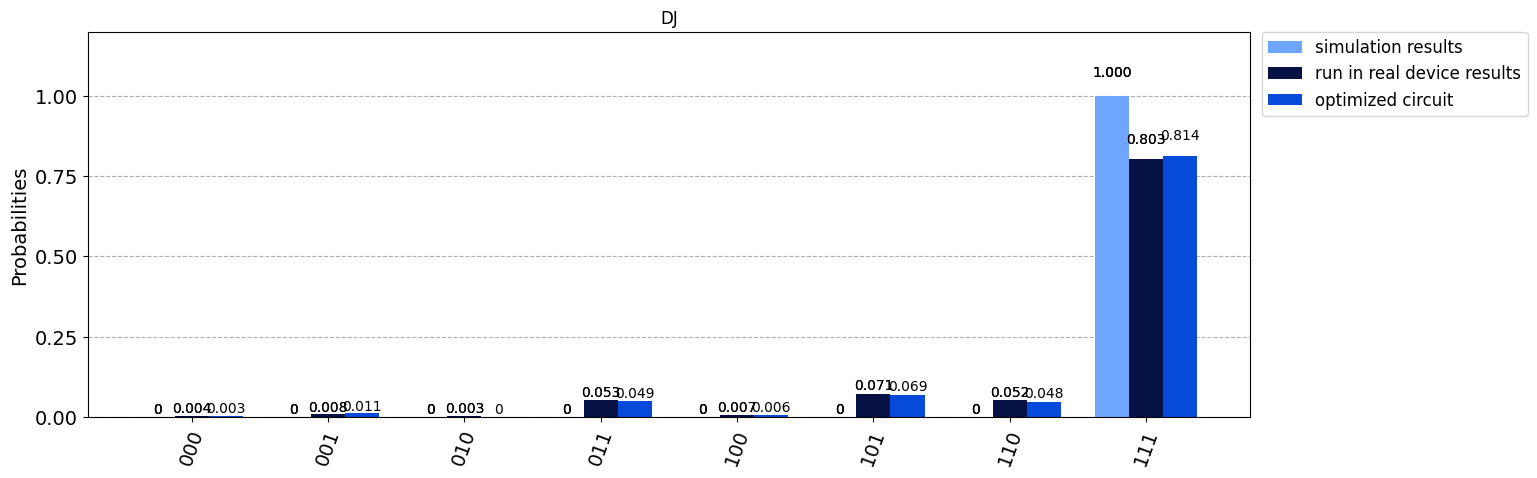

In [167]:
title = 'DJ'
legend = [ 'simulation results','run in real device results', 'optimized circuit']
color = ['#6ea6ff','#051243','#054ada']

plot_histogram([counts_sim, counts_noise, counts_noise_o], legend = legend, title= title, color=color, figsize=(15, 5))

<div class="alert alert-block alert-warning">

**Exercise** - Comment your results.
    
</div>